# **Question No 1: Part A)**

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch


In [2]:
#mounting google drive on colab and loading dataframe

from google.colab import drive
drive.mount('/content/drive')

train_file_path = '/content/drive/MyDrive/Colab Notebooks/Deep Learning/train.csv'
test_file_path = '/content/drive/MyDrive/Colab Notebooks/Deep Learning/test.csv'

df = pd.read_csv(train_file_path)
print("CSV file loaded successfully!")
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CSV file loaded successfully!
  neighbourhood_group        room_type  minimum_nights  amenity_score  \
0           Manhattan              NaN             2.0           82.5   
1           Manhattan     Private room             2.0           53.7   
2            Brooklyn     Private room             2.0           47.8   
3           Manhattan  Entire home/apt             2.0           58.8   
4               Bronx     Private room             2.0           32.2   

   number_of_reviews  availability_365  price_class  
0               15.0             254.0            3  
1                1.0               0.0            1  
2               70.0              90.0            1  
3                1.0               NaN            1  
4                0.0              89.0            1  


In [3]:
#data set size and number of missing values in each column.
print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.info())

print('-'*100)
print("\nMissing Values per Column:")
print(df.isnull().sum())


Dataset Shape: (41348, 7)

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41348 entries, 0 to 41347
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  40509 non-null  object 
 1   room_type            40737 non-null  object 
 2   minimum_nights       40026 non-null  float64
 3   amenity_score        40432 non-null  float64
 4   number_of_reviews    40225 non-null  float64
 5   availability_365     40753 non-null  float64
 6   price_class          41348 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 2.2+ MB
None
----------------------------------------------------------------------------------------------------

Missing Values per Column:
neighbourhood_group     839
room_type               611
minimum_nights         1322
amenity_score           916
number_of_reviews      1123
availability_365        595
price_class               0
dtype: int6

In [4]:
#filling missing values using mode and median values for each column.
df_clean = df.copy()

for col in ['neighbourhood_group', 'room_type']:
    mode_val = df_clean[col].mode()[0]
    df_clean[col] = df_clean[col].fillna(mode_val)
    print(f"Filled missing in '{col}' with mode: {mode_val}")

num_cols = ['minimum_nights', 'amenity_score', 'number_of_reviews', 'availability_365']
for col in num_cols:
    median_val = df_clean[col].median()
    df_clean[col] = df_clean[col].fillna(median_val)
    print(f"Filled missing in '{col}' with median: {median_val}")

print("\nRemaining Missing Values:", df_clean.isnull().sum().sum())

Filled missing in 'neighbourhood_group' with mode: Manhattan
Filled missing in 'room_type' with mode: Entire home/apt
Filled missing in 'minimum_nights' with median: 3.0
Filled missing in 'amenity_score' with median: 51.4
Filled missing in 'number_of_reviews' with median: 5.0
Filled missing in 'availability_365' with median: 44.0

Remaining Missing Values: 0



Class Distribution (%):
price_class
1    56.319532
2    23.807681
0    13.463771
3     6.409016
Name: proportion, dtype: float64


/tmp/ipython-input-1715348514.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_class', data=df_clean, palette='viridis')


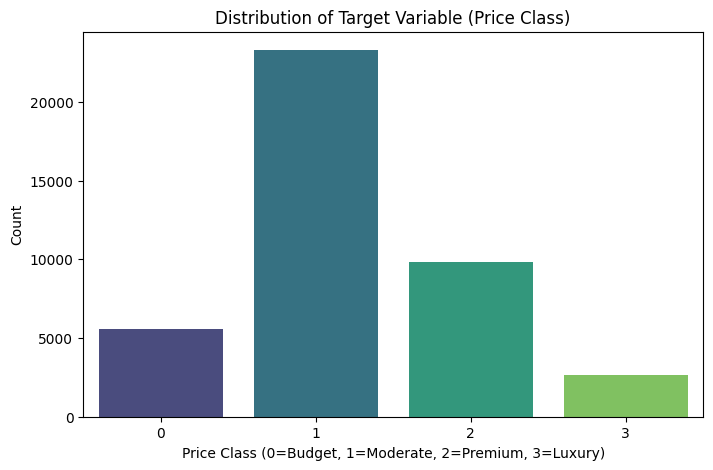

In [5]:
#distribution of output variable for the provided training set.
plt.figure(figsize=(8, 5))
sns.countplot(x='price_class', data=df_clean, palette='viridis')
plt.title('Distribution of Target Variable (Price Class)')
plt.xlabel('Price Class (0=Budget, 1=Moderate, 2=Premium, 3=Luxury)')
plt.ylabel('Count')

counts = df_clean['price_class'].value_counts(normalize=True) * 100
print("\nClass Distribution (%):")
print(counts)
plt.show()

In [6]:
#1-hot encoding for the columns with categorical data.
df_encoded = pd.get_dummies(df_clean, columns=['neighbourhood_group', 'room_type'], drop_first=False)

df_encoded = df_encoded.astype(float)

print("New shape after encoding:", df_encoded.shape)
df_encoded.head()

New shape after encoding: (41348, 13)


,minimum_nights,amenity_score,number_of_reviews,availability_365,price_class,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2.0,82.5,15.0,254.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2.0,53.7,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2.0,47.8,70.0,90.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,58.8,1.0,44.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,2.0,32.2,0.0,89.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler

features_to_scale = ['minimum_nights', 'amenity_score', 'number_of_reviews', 'availability_365']

scaler = StandardScaler()
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

print(df_encoded[features_to_scale].describe().round(2))

       minimum_nights  amenity_score  number_of_reviews  availability_365
count        41348.00       41348.00           41348.00          41348.00
mean            -0.00           0.00              -0.00             -0.00
std              1.00           1.00               1.00              1.00
min             -0.30          -2.18              -0.53             -0.85
25%             -0.30          -0.77              -0.50             -0.85
50%             -0.20          -0.03              -0.41             -0.51
75%             -0.10           0.72              -0.00              0.84
max             51.14           2.44              13.27              1.95


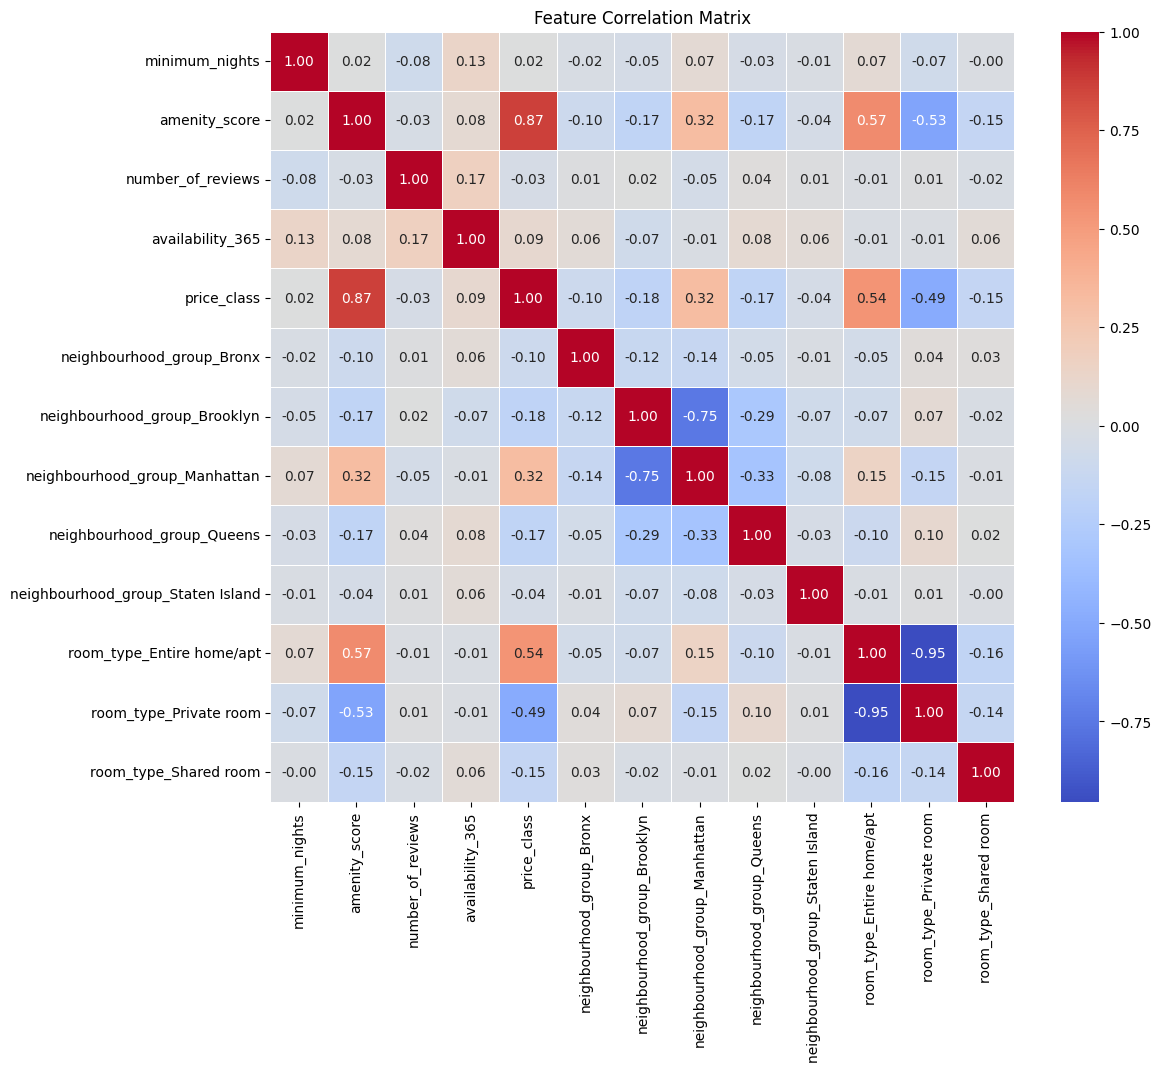

Correlation with Price Class:
price_class                          1.000000
amenity_score                        0.865352
room_type_Entire home/apt            0.538183
neighbourhood_group_Manhattan        0.319295
availability_365                     0.094887
minimum_nights                       0.016005
number_of_reviews                   -0.034259
neighbourhood_group_Staten Island   -0.042783
neighbourhood_group_Bronx           -0.095137
room_type_Shared room               -0.148515
neighbourhood_group_Queens          -0.168277
neighbourhood_group_Brooklyn        -0.179231
room_type_Private room              -0.494783
Name: price_class, dtype: float64


In [8]:
# Calculating correlation matrix
corr_matrix = df_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

print("Correlation with Price Class:")
print(corr_matrix['price_class'].sort_values(ascending=False))

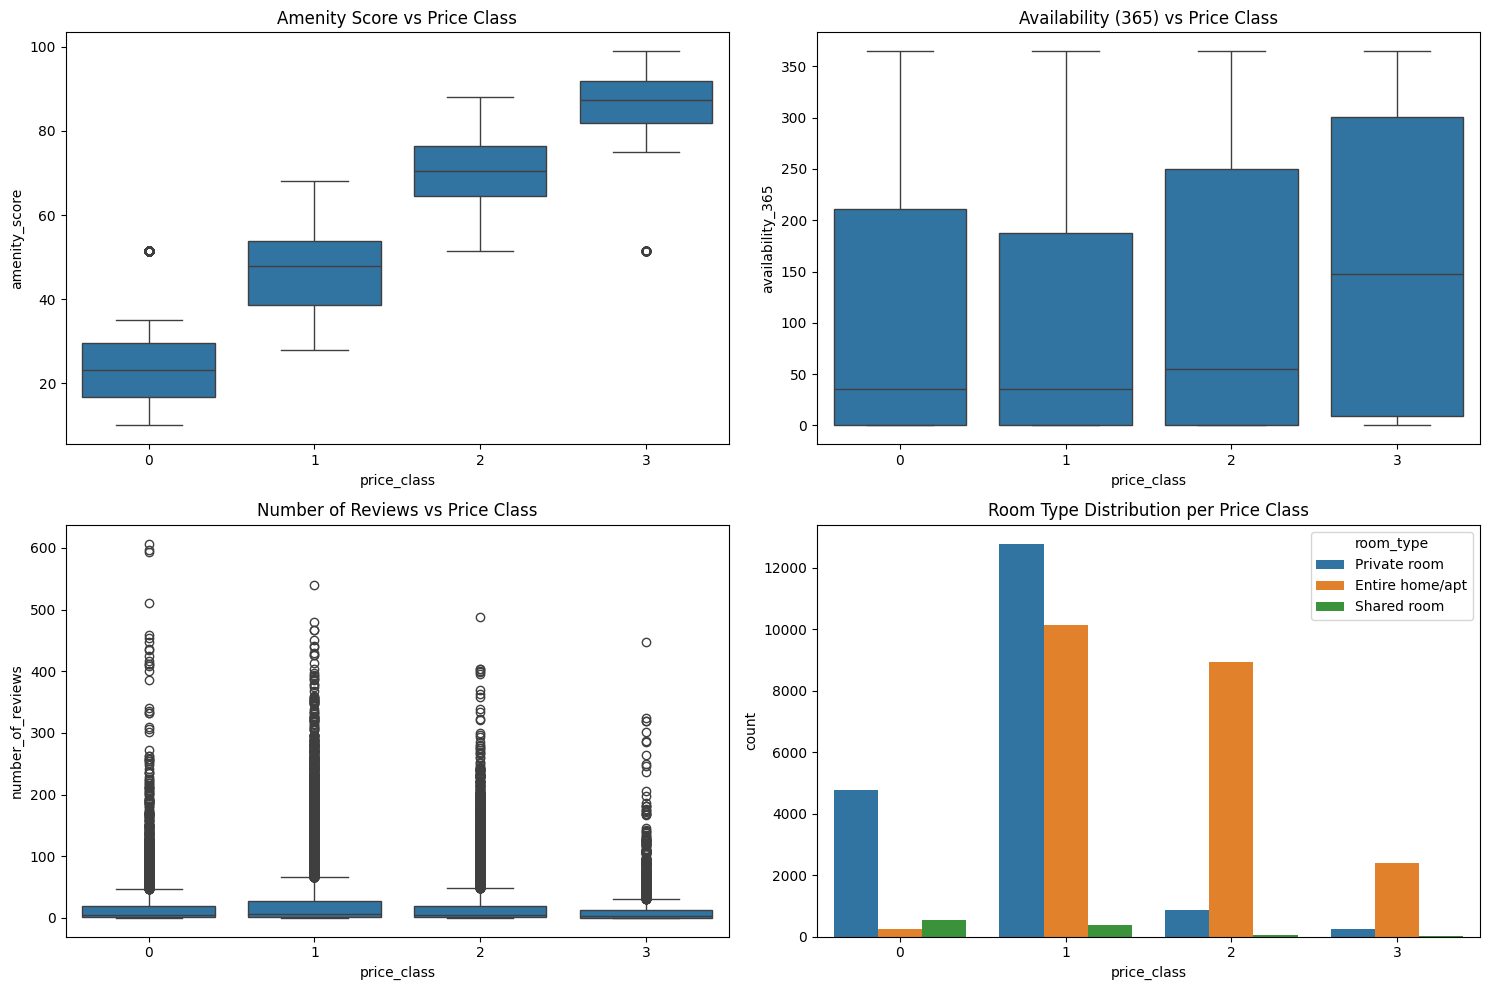

In [9]:
#We use different plots to understand the feature relationships
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(x='price_class', y='amenity_score', data=df_clean, ax=axes[0, 0])
axes[0, 0].set_title('Amenity Score vs Price Class')

sns.boxplot(x='price_class', y='availability_365', data=df_clean, ax=axes[0, 1])
axes[0, 1].set_title('Availability (365) vs Price Class')

sns.boxplot(x='price_class', y='number_of_reviews', data=df_clean, ax=axes[1, 0])
axes[1, 0].set_title('Number of Reviews vs Price Class')

sns.countplot(x='price_class', hue='room_type', data=df_clean, ax=axes[1, 1])
axes[1, 1].set_title('Room Type Distribution per Price Class')

plt.tight_layout()
plt.show()

# **Question No 1: Part B - (a)**

In [10]:
X_all = df_encoded.drop('price_class', axis=1).values
y_all = df_encoded['price_class'].values.astype(int)

num_samples = X_all.shape[0]
indices = np.arange(num_samples)
np.random.seed(42)
np.random.shuffle(indices)

# Splitting 80% Train, 20% Validation
split_idx = int(num_samples * 0.8)
train_idx = indices[:split_idx]
val_idx = indices[split_idx:]

X_train = X_all[train_idx]
y_train = y_all[train_idx]

X_val = X_all[val_idx]
y_val = y_all[val_idx]

print(f"Training Samples: {X_train.shape[0]}")
print(f"Validation Samples: {X_val.shape[0]}")

Training Samples: 33078
Validation Samples: 8270


Starting training with sigmoid...
Epoch 0: Train Acc: 0.5643, Val Acc: 0.5589
Epoch 20: Train Acc: 0.5643, Val Acc: 0.5589
Epoch 40: Train Acc: 0.5643, Val Acc: 0.5589
Epoch 60: Train Acc: 0.5643, Val Acc: 0.5589
Epoch 80: Train Acc: 0.5643, Val Acc: 0.5589
Epoch 100: Train Acc: 0.5643, Val Acc: 0.5589
Epoch 120: Train Acc: 0.5643, Val Acc: 0.5589
Epoch 140: Train Acc: 0.5643, Val Acc: 0.5589
Epoch 160: Train Acc: 0.5643, Val Acc: 0.5589
Epoch 180: Train Acc: 0.5643, Val Acc: 0.5589
Starting training with relu...
Epoch 0: Train Acc: 0.1976, Val Acc: 0.5589
Epoch 20: Train Acc: 0.5643, Val Acc: 0.5589
Epoch 40: Train Acc: 0.5643, Val Acc: 0.5589
Epoch 60: Train Acc: 0.5643, Val Acc: 0.5589
Epoch 80: Train Acc: 0.5643, Val Acc: 0.5589
Epoch 100: Train Acc: 0.5643, Val Acc: 0.5589
Epoch 120: Train Acc: 0.5643, Val Acc: 0.5589
Epoch 140: Train Acc: 0.5643, Val Acc: 0.5589
Epoch 160: Train Acc: 0.5643, Val Acc: 0.5589
Epoch 180: Train Acc: 0.5643, Val Acc: 0.5589

--- Final Results ---
Sigm

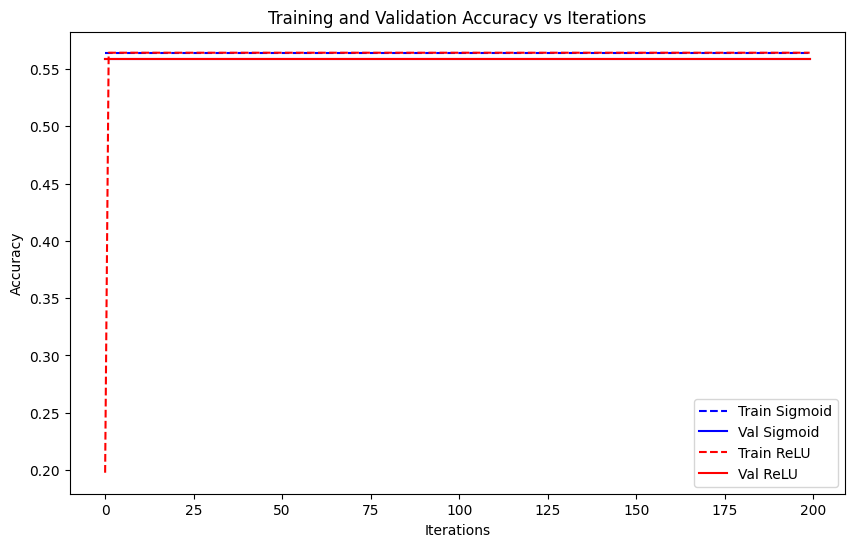

In [11]:
# --- Part B(a): Two-Layer Perceptron Implementation ---

def get_one_hot(targets, nb_classes):
    res = np.eye(nb_classes)[targets]
    return res

y_train_enc = get_one_hot(y_train, 4)
y_val_enc = get_one_hot(y_val, 4)

def my_softmax(z):
    e = np.exp(z - np.max(z, axis=1, keepdims=True))
    s = np.sum(e, axis=1, keepdims=True)
    return e / s

def run_experiment(activation_name):
    input_dim = X_train.shape[1]
    h1 = 64
    h2 = 32
    out_dim = 4
    lr = 0.01
    epochs = 200


    np.random.seed(42)
    w1 = np.random.randn(input_dim, h1) * 0.01
    b1 = np.zeros((1, h1))
    w2 = np.random.randn(h1, h2) * 0.01
    b2 = np.zeros((1, h2))
    w3 = np.random.randn(h2, out_dim) * 0.01
    b3 = np.zeros((1, out_dim))

    train_acc_list = []
    val_acc_list = []

    print(f"Starting training with {activation_name}...")

    for i in range(epochs):

        z1 = np.dot(X_train, w1) + b1
        if activation_name == 'sigmoid':
            a1 = 1 / (1 + np.exp(-z1))
        else:
            a1 = np.maximum(0, z1)

        z2 = np.dot(a1, w2) + b2
        if activation_name == 'sigmoid':
            a2 = 1 / (1 + np.exp(-z2))
        else:
            a2 = np.maximum(0, z2)

        z3 = np.dot(a2, w3) + b3
        a3 = my_softmax(z3)

        m = y_train.shape[0]

        loss = -np.sum(y_train_enc * np.log(a3 + 1e-9)) / m

        pred_train = np.argmax(a3, axis=1)
        acc_tr = np.mean(pred_train == y_train)
        train_acc_list.append(acc_tr)

        dz3 = a3 - y_train_enc
        dw3 = np.dot(a2.T, dz3) / m
        db3 = np.sum(dz3, axis=0, keepdims=True) / m

        da2 = np.dot(dz3, w3.T)
        if activation_name == 'sigmoid':
            dz2 = da2 * (a2 * (1 - a2))
        else:
            dz2 = da2.copy()
            dz2[z2 <= 0] = 0

        dw2 = np.dot(a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        da1 = np.dot(dz2, w2.T)
        if activation_name == 'sigmoid':
            dz1 = da1 * (a1 * (1 - a1))
        else:
            dz1 = da1.copy()
            dz1[z1 <= 0] = 0

        dw1 = np.dot(X_train.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        w1 = w1 - lr * dw1
        b1 = b1 - lr * db1
        w2 = w2 - lr * dw2
        b2 = b2 - lr * db2
        w3 = w3 - lr * dw3
        b3 = b3 - lr * db3

        v_z1 = np.dot(X_val, w1) + b1
        if activation_name == 'sigmoid':
            v_a1 = 1 / (1 + np.exp(-v_z1))
        else:
            v_a1 = np.maximum(0, v_z1)

        v_z2 = np.dot(v_a1, w2) + b2
        if activation_name == 'sigmoid':
            v_a2 = 1 / (1 + np.exp(-v_z2))
        else:
            v_a2 = np.maximum(0, v_z2)

        v_z3 = np.dot(v_a2, w3) + b3
        v_a3 = my_softmax(v_z3)

        pred_val = np.argmax(v_a3, axis=1)
        acc_v = np.mean(pred_val == y_val)
        val_acc_list.append(acc_v)

        if i % 20 == 0:
            print(f"Epoch {i}: Train Acc: {acc_tr:.4f}, Val Acc: {acc_v:.4f}")

    return train_acc_list, val_acc_list, acc_tr, acc_v

tr_sig, val_sig, final_tr_sig, final_val_sig = run_experiment('sigmoid')
tr_relu, val_relu, final_tr_relu, final_val_relu = run_experiment('relu')

print("\n--- Final Results ---")
print("Sigmoid Train:", final_tr_sig)
print("Sigmoid Val:", final_val_sig)
print("ReLU Train:", final_tr_relu)
print("ReLU Val:", final_val_relu)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(tr_sig, label='Train Sigmoid', color='blue', linestyle='--')
plt.plot(val_sig, label='Val Sigmoid', color='blue')
plt.plot(tr_relu, label='Train ReLU', color='red', linestyle='--')
plt.plot(val_relu, label='Val ReLU', color='red')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Iterations')
plt.legend()
plt.show()

# **Question No 1: Part B - (b)**

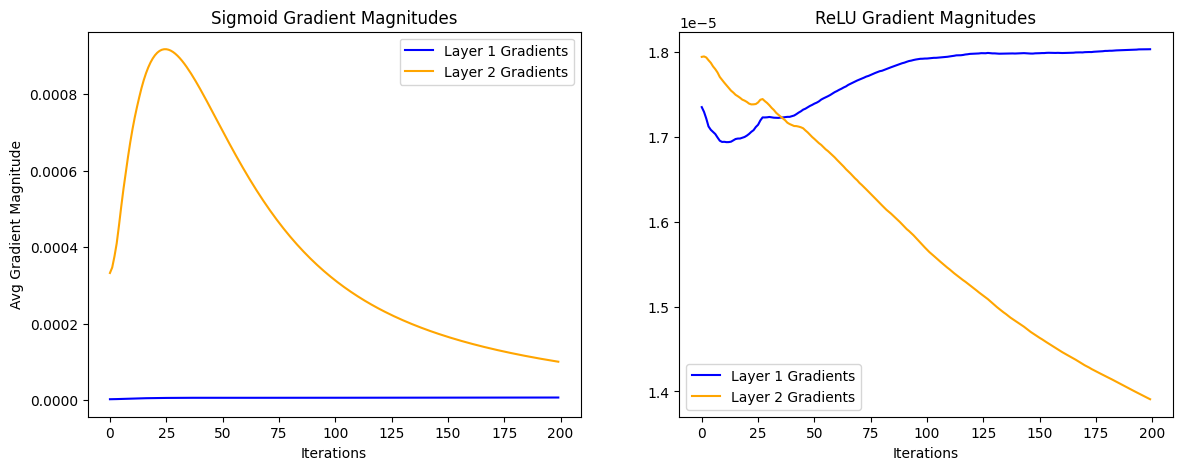

Sigmoid Layer 1 mean grad: 6.138980048976196e-06
Sigmoid Layer 2 mean grad: 0.00040271727474845844
ReLU Layer 1 mean grad: 1.770561040697503e-05
ReLU Layer 2 mean grad: 1.578877056375359e-05


In [12]:
def run_grad_experiment_thingy(my_act_name):
    input_dim = X_train.shape[1]
    h1 = 64
    h2 = 32
    out_dim = 4
    lr = 0.01
    epochs = 200

    np.random.seed(42)
    w1 = np.random.randn(input_dim, h1) * 0.01
    b1 = np.zeros((1, h1))
    w2 = np.random.randn(h1, h2) * 0.01
    b2 = np.zeros((1, h2))
    w3 = np.random.randn(h2, out_dim) * 0.01
    b3 = np.zeros((1, out_dim))

    grad_list_1 = []
    grad_list_2 = []

    for i in range(epochs):
        z1 = np.dot(X_train, w1) + b1
        if my_act_name == 'sigmoid':
            a1 = 1 / (1 + np.exp(-z1))
        else:
            a1 = np.maximum(0, z1)

        z2 = np.dot(a1, w2) + b2
        if my_act_name == 'sigmoid':
            a2 = 1 / (1 + np.exp(-z2))
        else:
            a2 = np.maximum(0, z2)

        z3 = np.dot(a2, w3) + b3

        exp_z = np.exp(z3 - np.max(z3, axis=1, keepdims=True))
        a3 = exp_z / np.sum(exp_z, axis=1, keepdims=True)

        m = y_train.shape[0]
        dz3 = a3 - y_train_enc
        dw3 = np.dot(a2.T, dz3) / m
        db3 = np.sum(dz3, axis=0, keepdims=True) / m

        da2 = np.dot(dz3, w3.T)
        if my_act_name == 'sigmoid':
            dz2 = da2 * (a2 * (1 - a2))
        else:
            dz2 = da2.copy()
            dz2[z2 <= 0] = 0

        dw2 = np.dot(a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        da1 = np.dot(dz2, w2.T)
        if my_act_name == 'sigmoid':
            dz1 = da1 * (a1 * (1 - a1))
        else:
            dz1 = da1.copy()
            dz1[z1 <= 0] = 0

        dw1 = np.dot(X_train.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        mag1 = np.mean(np.abs(dw1))
        mag2 = np.mean(np.abs(dw2))

        grad_list_1.append(mag1)
        grad_list_2.append(mag2)

        w1 = w1 - lr * dw1
        b1 = b1 - lr * db1
        w2 = w2 - lr * dw2
        b2 = b2 - lr * db2
        w3 = w3 - lr * dw3
        b3 = b3 - lr * db3

    return grad_list_1, grad_list_2

sig_g1, sig_g2 = run_grad_experiment_thingy('sigmoid')
relu_g1, relu_g2 = run_grad_experiment_thingy('relu')

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(sig_g1, label='Layer 1 Gradients', color='blue')
ax[0].plot(sig_g2, label='Layer 2 Gradients', color='orange')
ax[0].set_title('Sigmoid Gradient Magnitudes')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Avg Gradient Magnitude')
ax[0].legend()

ax[1].plot(relu_g1, label='Layer 1 Gradients', color='blue')
ax[1].plot(relu_g2, label='Layer 2 Gradients', color='orange')
ax[1].set_title('ReLU Gradient Magnitudes')
ax[1].set_xlabel('Iterations')
ax[1].legend()

plt.show()

print("Sigmoid Layer 1 mean grad:", np.mean(sig_g1))
print("Sigmoid Layer 2 mean grad:", np.mean(sig_g2))
print("ReLU Layer 1 mean grad:", np.mean(relu_g1))
print("ReLU Layer 2 mean grad:", np.mean(relu_g2))

# **Question No 1: Part C - (b)**

RANKED FEATURE IMPORTANCE LIST:
                              Feature  Importance
1                       amenity_score  100.000000
8   neighbourhood_group_Staten Island   41.172955
7          neighbourhood_group_Queens   30.406218
9           room_type_Entire home/apt   26.897314
4           neighbourhood_group_Bronx   26.476351
10             room_type_Private room   25.834860
6       neighbourhood_group_Manhattan   25.741064
5        neighbourhood_group_Brooklyn   25.164251
11              room_type_Shared room   16.609373
0                      minimum_nights    7.584183
2                   number_of_reviews    4.561653
3                    availability_365    0.000000


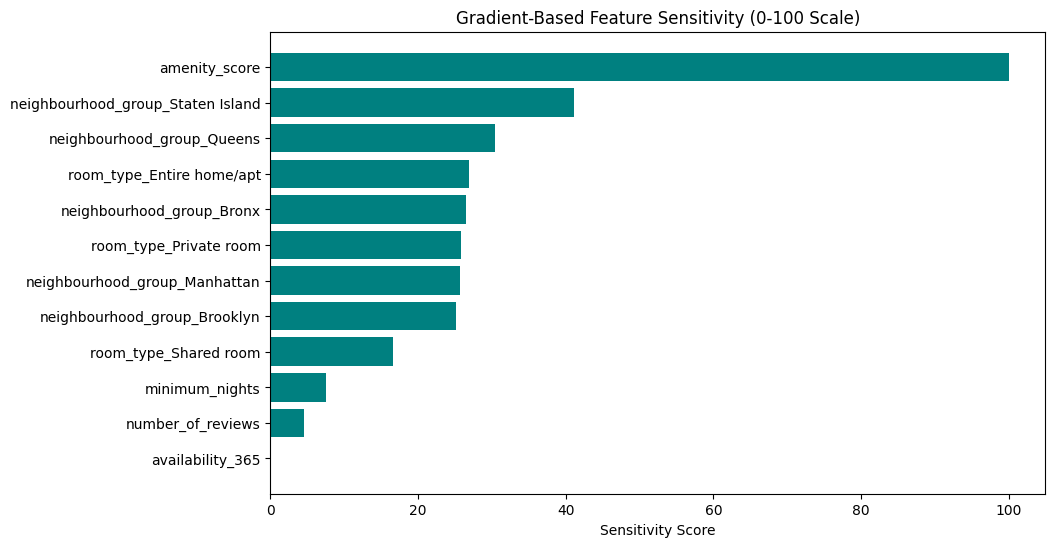

In [13]:
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler, MinMaxScaler

raw_data_frame = pd.read_csv(train_file_path)

clean_frame = raw_data_frame.copy()
cat_cols = ['neighbourhood_group', 'room_type']
for c in cat_cols:
    val_mode = clean_frame[c].mode()[0]
    clean_frame[c] = clean_frame[c].fillna(val_mode)

num_cols = ['minimum_nights', 'amenity_score', 'number_of_reviews', 'availability_365']
for n in num_cols:
    val_med = clean_frame[n].median()
    clean_frame[n] = clean_frame[n].fillna(val_med)

hot_encoded = pd.get_dummies(clean_frame[cat_cols], drop_first=False)
hot_encoded = hot_encoded.astype(float)

scaler_standard = StandardScaler()
scaled_numerics = scaler_standard.fit_transform(clean_frame[num_cols])

final_x_array = np.hstack([scaled_numerics, hot_encoded.values])
final_y_array = clean_frame['price_class'].values
feature_names_list = num_cols + list(hot_encoded.columns)

tensor_x = torch.tensor(final_x_array, dtype=torch.float32)
tensor_y = torch.tensor(final_y_array, dtype=torch.long)

torch.manual_seed(999)
perm_idxs = torch.randperm(len(tensor_x))
split_point = int(0.8 * len(tensor_x))

train_x_t = tensor_x[perm_idxs[:split_point]]
train_y_t = tensor_y[perm_idxs[:split_point]]
val_x_t = tensor_x[perm_idxs[split_point:]]
val_y_t = tensor_y[perm_idxs[split_point:]]

class MySimpleMLP(nn.Module):
    def __init__(self, in_dim, h1, h2, out_dim):
        super(MySimpleMLP, self).__init__()
        self.layer1 = nn.Linear(in_dim, h1)
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(h1, h2)
        self.act2 = nn.ReLU()
        self.layer3 = nn.Linear(h2, out_dim)

    def forward(self, x):
        x = self.layer1(x)
        x = self.act1(x)
        x = self.layer2(x)
        x = self.act2(x)
        x = self.layer3(x)
        return x

input_size = train_x_t.shape[1]
my_net = MySimpleMLP(input_size, 64, 32, 4)
optimizer = optim.Adam(my_net.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

for epoch in range(150):
    optimizer.zero_grad()
    outputs = my_net(train_x_t)
    loss = criterion(outputs, train_y_t)
    loss.backward()
    optimizer.step()

val_x_t.requires_grad = True
final_outputs = my_net(val_x_t)
final_loss = criterion(final_outputs, val_y_t)
final_loss.backward()

gradients = val_x_t.grad
abs_grads = torch.abs(gradients)
mean_importance = torch.mean(abs_grads, dim=0).detach().numpy()

min_max_scaler = MinMaxScaler((0, 100))
importance_scores = min_max_scaler.fit_transform(mean_importance.reshape(-1, 1)).flatten()

results_df = pd.DataFrame({'Feature': feature_names_list, 'Importance': importance_scores})
results_df = results_df.sort_values(by='Importance', ascending=False)

print("RANKED FEATURE IMPORTANCE LIST:")
print(results_df)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(results_df['Feature'], results_df['Importance'], color='teal')
plt.gca().invert_yaxis()
plt.title("Gradient-Based Feature Sensitivity (0-100 Scale)")
plt.xlabel("Sensitivity Score")
plt.show()

# **Question No 1: Part D**

In [14]:
df_train = pd.read_csv(train_file_path)
df_test = pd.read_csv(test_file_path)

train_clean = df_train.copy()
cats = ['neighbourhood_group', 'room_type']
nums = ['minimum_nights', 'amenity_score', 'number_of_reviews', 'availability_365']

cat_modes = {}
for c in cats:
    m = train_clean[c].mode()[0]
    cat_modes[c] = m
    train_clean[c] = train_clean[c].fillna(m)

num_medians = {}
for n in nums:
    md = train_clean[n].median()
    num_medians[n] = md
    train_clean[n] = train_clean[n].fillna(md)

test_clean = df_test.copy()
for c in cats:
    test_clean[c] = test_clean[c].fillna(cat_modes[c])
for n in nums:
    test_clean[n] = test_clean[n].fillna(num_medians[n])

n_train = len(train_clean)
combined = pd.concat([train_clean, test_clean], axis=0)
combined_dummies = pd.get_dummies(combined[cats], drop_first=False)
combined_dummies = combined_dummies.astype(float)

train_dummies = combined_dummies.iloc[:n_train]
test_dummies = combined_dummies.iloc[n_train:]

scaler = StandardScaler()
train_scaled_nums = scaler.fit_transform(train_clean[nums])
test_scaled_nums = scaler.transform(test_clean[nums])

X_train_final = np.hstack([train_scaled_nums, train_dummies.values])
y_train_final = train_clean['price_class'].values

X_test_final = np.hstack([test_scaled_nums, test_dummies.values])
if 'price_class' in test_clean.columns:
    y_test_final = test_clean['price_class'].values
else:
    print("Warning: No price_class in test.csv. Cannot calculate Test Accuracy.")
    y_test_final = np.zeros(len(test_clean)) # Dummy

x_t = torch.tensor(X_train_final, dtype=torch.float32)
y_t = torch.tensor(y_train_final, dtype=torch.long)
x_test_t = torch.tensor(X_test_final, dtype=torch.float32)
y_test_t = torch.tensor(y_test_final, dtype=torch.long)

torch.manual_seed(42)
idxs = torch.randperm(len(x_t))
split = int(0.8 * len(x_t))
tr_x = x_t[idxs[:split]]
tr_y = y_t[idxs[:split]]
val_x = x_t[idxs[split:]]
val_y = y_t[idxs[split:]]

class FinalNet(nn.Module):
    def __init__(self, d_in):
        super(FinalNet, self).__init__()
        self.lay1 = nn.Linear(d_in, 64)
        self.r1 = nn.ReLU()
        self.lay2 = nn.Linear(64, 32)
        self.r2 = nn.ReLU()
        self.lay3 = nn.Linear(32, 4)

    def forward(self, x):
        x = self.r1(self.lay1(x))
        x = self.r2(self.lay2(x))
        x = self.lay3(x)
        return x

model = FinalNet(tr_x.shape[1])
opt = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

print("Training Model...")
for e in range(200):
    opt.zero_grad()
    out = model(tr_x)
    loss = loss_fn(out, tr_y)
    loss.backward()
    opt.step()

model.eval()
with torch.no_grad():
    tr_pred = torch.argmax(model(tr_x), dim=1)
    tr_acc = (tr_pred == tr_y).float().mean().item()

    val_pred = torch.argmax(model(val_x), dim=1)
    val_acc = (val_pred == val_y).float().mean().item()

    test_pred = torch.argmax(model(x_test_t), dim=1)
    test_acc = (test_pred == y_test_t).float().mean().item()

print("\n--- RESULTS ---")
print(f"Final Train Accuracy: {tr_acc*100:.2f}%")
print(f"Final Val Accuracy:   {val_acc*100:.2f}%")
print(f"TEST DATASET ACCURACY: {test_acc*100:.2f}%")

print("\n--- DIAGNOSTICS ---")
print("Train Amenity Mean:", train_clean['amenity_score'].mean())
print("Test Amenity Mean: ", test_clean['amenity_score'].mean())

x_test_modified = x_test_t.clone()

x_test_modified[:, 1] = 0.0
mod_pred = torch.argmax(model(x_test_modified), dim=1)
mod_acc = (mod_pred == y_test_t).float().mean().item()
print(f"Test Acc if 'amenity_score' is removed: {mod_acc*100:.2f}%")

Training Model...

--- RESULTS ---
Final Train Accuracy: 84.33%
Final Val Accuracy:   82.32%
TEST DATASET ACCURACY: 34.14%

--- DIAGNOSTICS ---
Train Amenity Mean: 51.97422366257134
Test Amenity Mean:  54.15185692750446
Test Acc if 'amenity_score' is removed: 56.31%
